# Layer Explaination

In [1]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [2]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
image = train_x[0]

이미지를 열어봤으니 무엇을 확인 해볼까요?

In [5]:
# 이미지 shape 확인
image.shape

(28, 28)

차원 수를 확인 했는데 어떤 결과가 나왔나요? 

[batch_size, height, width, channel]

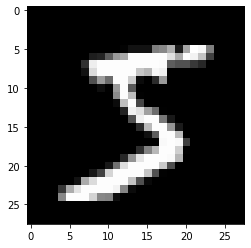

In [6]:
plt.imshow(image, 'gray')
plt.show()

In [7]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

![image.png](attachment:image.png)

## Convolution

![image.png](attachment:image.png)

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [8]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [9]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

### Visualization

- tf.keras.layers.Conv2D

In [10]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [11]:
layer = tf.keras.layers.Conv2D(3,3,1,padding='SAME')
layer

In [12]:
output = layer(image) 

In [13]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [14]:
np.min(output), np.max(output)

(-119.9457, 185.448)

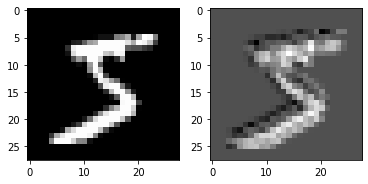

In [15]:

plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0], 'gray')
plt.show()

weight 불러오기

- layer.get_weights()

In [16]:
weight = layer.get_weights()

In [17]:
len(weight)

2

In [18]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

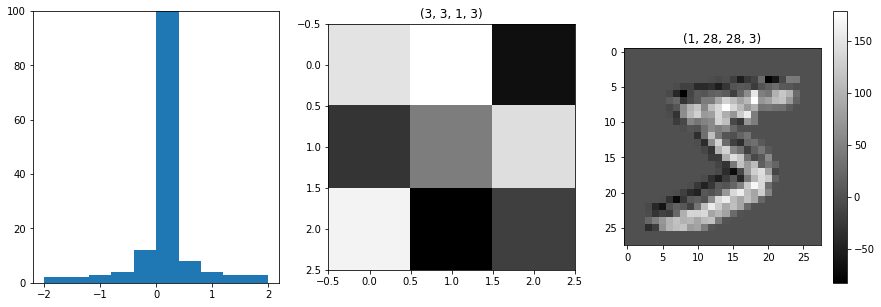

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Activation Function

![image.png](attachment:image.png)

In [20]:
tf.keras.layers.ReLU()

In [22]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [24]:
output.shape

TensorShape([1, 28, 28, 3])

In [23]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [27]:
np.min(output), np.max(output)

(-119.9457, 185.448)

In [26]:
np.min(act_output), np.max(act_output)

(0.0, 185.448)

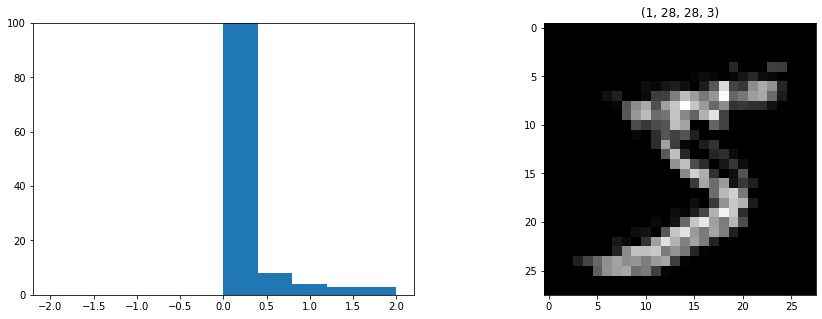

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

## Pooling

**굵은 텍스트**![image.png](attachment:image.png)

- tf.keras.layers.MaxPool2D

In [31]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [32]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [33]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [34]:
pool_output.shape

TensorShape([1, 14, 14, 3])

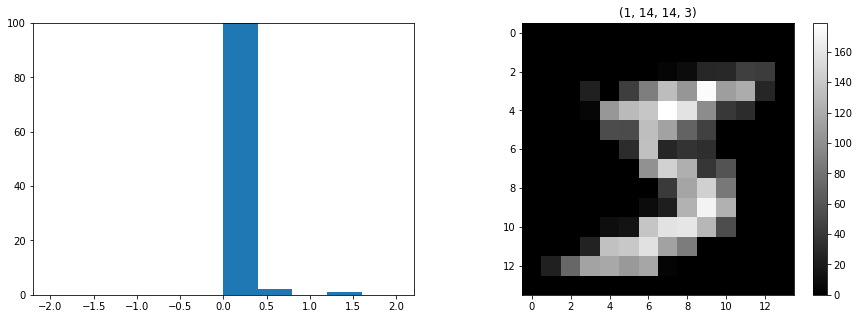

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

![image.png](attachment:image.png)

## Flatten

![image.png](attachment:image.png)

- tf.keras.layers.Flatten()

In [37]:
import tensorflow as tf 

In [38]:
tf.keras.layers.Flatten()

In [39]:
layer = tf.keras.layers.Flatten()

In [40]:
flatten = layer(output)

In [41]:
output.shape

TensorShape([1, 28, 28, 3])

In [42]:
flatten.shape

TensorShape([1, 2352])

In [43]:
28 * 28 * 3

2352

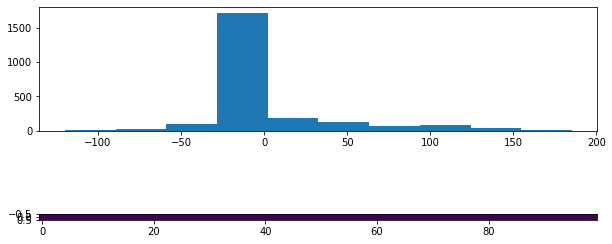

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100])
plt.show()

## Dense

![image.png](attachment:image.png)

- tf.keras.layers.Dense

In [47]:
tf.keras.layers.Dense(32, activation='relu')

In [48]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [49]:
output = layer(flatten)

In [50]:
output.shape

TensorShape([1, 32])

In [51]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)

In [52]:
output_example.shape

TensorShape([1, 10])

## DropOut

![image.png](attachment:image.png)

- tf.keras.layers.Dropout

In [53]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [54]:
output.shape

TensorShape([1, 32])

# Build Model

![image.png](attachment:image.png)

In [21]:
from tensorflow.keras import layers

In [55]:
input_shape = (28, 28, 1)
num_classes = 10

In [57]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32, 2, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 2, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(2, 2)(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 2, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 2, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(2, 2)(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [58]:
model

## Summary

In [59]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        4128      
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0 